# LinearRegression
### sklearn.linear_model.LinearRegression
# 선형회귀
# 경사하강


* MSE,MAE와 같은 것들을 손실 함수라 함
* 피처값이 하나더라도 w값을 하나만 갖는게 아니라 여러개 가질 수 있음
* 일반적인 선형회귀방법은 w,b값 패널티 안주고 조절하는데, 릿지와 라쏘는 RSS에 패널티 주고 조절 쓸모없는 피처값 제거하면서 과적합방지
* 라쏘는 필요없는 것을 제거시켜주므로 남아있는 피쳐들로 다른 알고리즘에 적용시킬 수 있음
* L1규제 릿지 제곱값, L2규제는 라쏘 절대값
* 그래디언트 디센트 w0,w1을 조절해서 편미분계수가 0이 되는 것을 찾는 것임
* 경사하강법은 step이 보폭 learnig rate를 결정해주는게 step()임 -optimizer

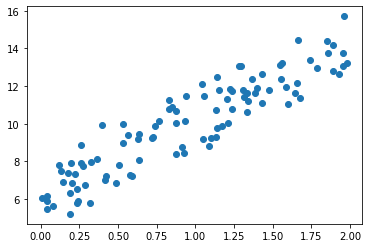

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4X + 6 식을 근사 (w1 = 4, w0 = 6). random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot 으로 시각화
plt.scatter(X,y)

In [4]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계싼하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 내적으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여
    # w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935
MAE:0.9935


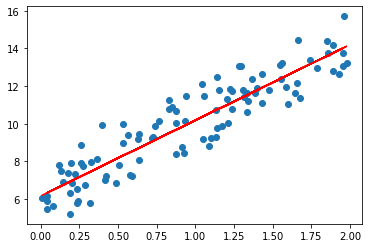

In [17]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N 

# 오차값
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}")
y_pred = w1[0,0]*X + w0
print(f"Gradient Descent Total Cost:{get_cost(y, y_pred):.4f}")
print(f"MAE:{get_cost(y, y_pred):.4f}")

plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

* 에포크는 훈련횟수
* 

In [10]:
# 샘플링으로 데이터를 추출하여 시간 단축

def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1= np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X,sampele_y로 저장
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y =y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산후 업데이트
        w1_update, w0_update= get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1= w1- w1_update
        w0 = w0- w0_update
        
    return w1,w0 

In [7]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [8]:
w1,w0= stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:", round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


# 다중 공선성
* 상관관계가 강한 피쳐들이 있다
* 있는지 없는지 파악하기 위해서 탐색적 분석필요(시각화)
##### 중요한 피처만 남기고 제거하거나 규제를 적용

In [12]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [22]:
reg= linear_model.LinearRegression()

X=[[174],[152],[138],[128],[186]] #세로로 쭉이어진 배열
y=[71,55,46,38,88]

reg.fit(X,y)

print(reg.predict([[200]]))

[96.01738241]


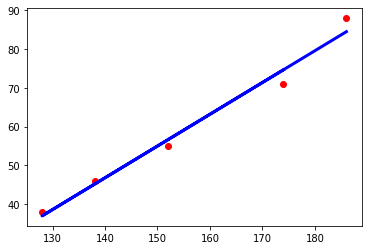

In [15]:
# 학습데이터와 y값을 산포도로 그린다.
plt.scatter(X,y,color="red")

# 학습데이터와 y값을 산포도로 그린다
y_pred =reg.predict(X)

#학습데이터와 예측값으로 선그래프로 그린다.
#계산된 기울기와 y절편을 가지는 직선이 그려진다

plt.plot(X,y_pred,color='blue',linewidth=3)
plt.show()